In [2]:
import pandas as pd
import numpy as np
import os, sys
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [11]:
df_stats = pd.read_csv('../../Togga/bitbucket/toggadata/all_players_stats_2017-18-w9.csv', encoding='latin-1')
df_players = pd.read_csv('../../Togga/bitbucket/toggadata/all_players_bio_2017-18-w9.csv', encoding='latin-1')


In [32]:
stats_cols = ['Assists', 'Aerials', 'BlockedShots', 'GKCatch',
       'ChancesCreated', 'Clearances', 'CleanSheet', 'Dispossessed',
       'FoulsConceded', 'FoulsWon', 'Goals', 'GoalsConceded', 'Interceptions',
       'MinutesPlayed', 'OwnGoals', 'GKPunch', 'PM', 'PS', 'PenaltyWon',
       'RedCards', 'SA', 'SuccessCrosses', 'ShotsTotal', 'ShotsOnTarget',
       'SuccessfulPasses', 'SuccessThroughBalls', 'SuccessTakeOns', 'GKSaves',
       'TacklesWon', 'YellowCards']

30

In [14]:
grouped_stats = df_stats.groupby(['PlayerId', 'PlayerName'], as_index=False)[stats_cols].sum().fillna(0)

In [16]:
position_cluster = pd.merge(
    grouped_stats.loc[grouped_stats['MinutesPlayed'] >= 180],
    df_players[['PlayerId','Position','RealPos','RealPosSide']],
    on='PlayerId',
    how='inner')

In [23]:
position_cluster.head().T

,0,1,2,3,4
PlayerId,p100059,p100180,p100412,p101148,p101668
PlayerName,Alberto Moreno,Danilo,André Carrillo,Jamaal Lascelles,Jamie Vardy
Assists,1,1,1,0,0
Aerials,10,5,4,21,19
BlockedShots,5,1,1,0,5
GKCatch,0,0,0,0,0
ChancesCreated,9,1,2,2,7
Clearances,17,8,4,56,4
CleanSheet,2,3,1,3,2
Dispossessed,0,2,6,4,2


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
from sklearn import preprocessing
from sklearn import cluster


In [25]:
# Initialize a label encoder (eg DEF -> 0)
le = preprocessing.LabelEncoder()

# Get a numpy array of the stats columns and store as data
data = position_cluster[stats_cols].values
z_scaler = StandardScaler()
data_scaled = z_scaler.fit_transform(data)


# Get the position labels and transform into categorical
labels = position_cluster['Position'].values
le.fit(labels)
labels_cat = le.transform(labels)

# Save some other dataset features
n_samples, n_features = data.shape
n_pos = len(np.unique(labels))
target_names = np.unique(labels_cat)

print(data.shape)

(312, 30)


/Users/joelelster/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [44]:
# Fit a pca (principle component analysis)

pca = PCA(n_components=10)
data_r = pca.fit(data_scaled).transform(data_scaled)

print('explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))
print('sum of explained variance (first two components): %s' % str(sum(pca.explained_variance_ratio_)))


explained variance ratio (first two components): [ 0.20766204  0.13981136  0.10144901  0.07259548  0.0559525   0.04403117
  0.03908202  0.0360819   0.03338067  0.03101031]
sum of explained variance (first two components): 0.761056460775


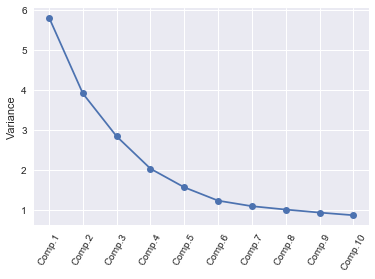

In [48]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, data_scaled)

In [58]:
pca_loadings = pd.DataFrame({
    'PCA1': pca.components_[0],
    'PCA2': pca.components_[1],
    'PCA3': pca.components_[2]
}, index=stats_cols).round(3)

In [59]:
pca_loadings

,PCA1,PCA2,PCA3
Assists,0.268,-0.029,0.092
Aerials,0.023,0.290,-0.056
BlockedShots,0.311,-0.059,0.056
GKCatch,-0.162,-0.108,0.448
ChancesCreated,0.330,-0.005,0.082
Clearances,-0.094,0.384,-0.017
CleanSheet,0.158,0.144,0.226
Dispossessed,0.312,-0.087,0.016
FoulsConceded,0.000,0.000,0.000
FoulsWon,-0.000,0.000,0.000


In [61]:
data_scaled.shape

(312, 30)

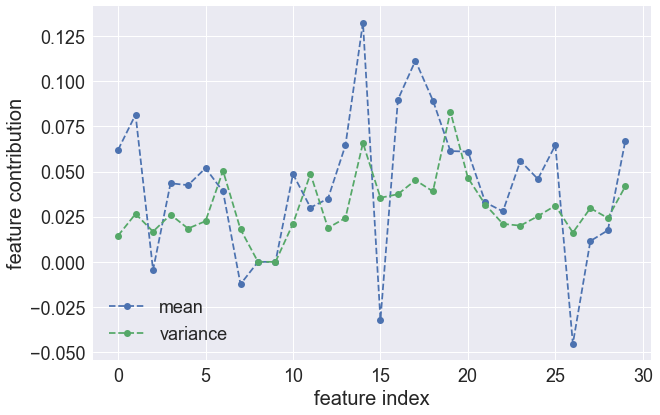

In [62]:
pca_data = pca.fit_transform(data_scaled)
pca_inv_data = pca.inverse_transform(np.eye(10))

fig = plt.figure(figsize=(10, 6.5))
plt.plot(pca_inv_data.mean(axis=0), '--o', label = 'mean')
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20);
plt.xlabel('feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
#plt.xlim([0, 29])
plt.legend(loc='lower left', fontsize=18)

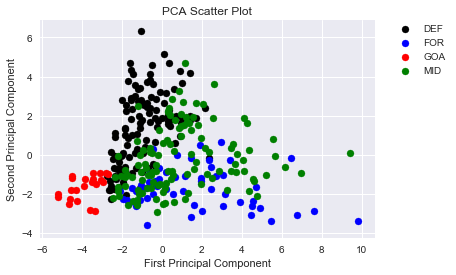

In [63]:
# Scatter plot analysis of first two pricinpal components
colors = ['black', 'blue', 'red','green']
for i, target in zip(range(n_pos), target_names):
    x = data_r[:, 0][labels_cat == target]
    y = data_r[:, 1][labels_cat == target]
    plt.scatter(x, y, c=colors[i])
plt.legend(le.inverse_transform(target_names), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()


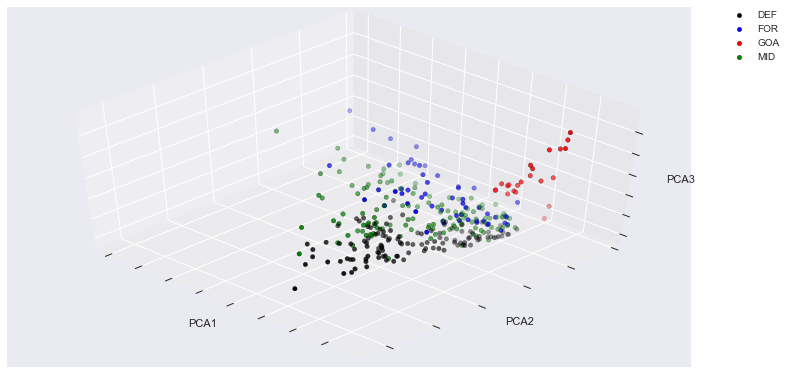

In [68]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(10,5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
#labels 
colors = ['black', 'blue', 'red','green']
plt.cla()
# Scatter plot analysis of first two pricinpal components
colors = ['black', 'blue', 'red','green']
for i, target in zip(range(n_pos), target_names):
    x = data_r[:, 0][labels_cat == target]
    y = data_r[:, 1][labels_cat == target]
    z = data_r[:, 2][labels_cat == target]
    ax.scatter(x, y, z, 
                c=colors[i],
                edgecolor='k',
                marker='o')

ax.legend(le.inverse_transform(target_names), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.w_xaxis.set_ticklabels([])
ax.w_xaxis.set_label_text("PCA1")
ax.w_yaxis.set_ticklabels([])
ax.w_yaxis.set_label_text("PCA2")
ax.w_zaxis.set_ticklabels([])
ax.w_zaxis.set_label_text("PCA3")

plt.show()

In [69]:
pca_corr = position_cluster[stats_cols].copy()
pca_corr.loc[:, 'PCA1'] = data_r[:,0]
pca_corr.loc[:, 'PCA2'] = data_r[:,1]
pca_corr.loc[:, 'PCA3'] = data_r[:,2]

pca_corr = pca_corr.corr()

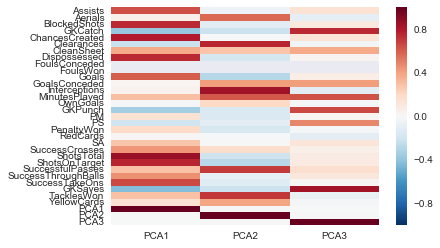

In [71]:
# plot the heatmap
sns.heatmap(pca_corr[['PCA1','PCA2','PCA3']])#, 
        #xticklabels=pca_corr.columns,
        #yticklabels=pca_corr.columns)

In [72]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import cluster

# Scale data
#data = scale(data)
indices = np.arange(data_scaled.shape[0])

# Split the `digits` data into training and test sets
X_train, X_test, y_train, y_test, idx1, idx2 = train_test_split(data_scaled, labels_cat, indices, test_size=0.25, random_state=42)
model_type = 'k-means++'
kmeans = cluster.KMeans(init=model_type, n_clusters=4, random_state=42)

# Fit the training data `X_train`to the model
kmeans.fit(X_train)

# Get predictions on 'X_test'
y_pred=kmeans.predict(X_test)

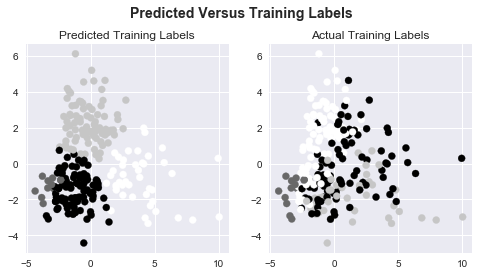

In [73]:
# Model and fit the `digits` data to the PCA model
X_pca = PCA(n_components=3).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
clusters = kmeans.fit_predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()

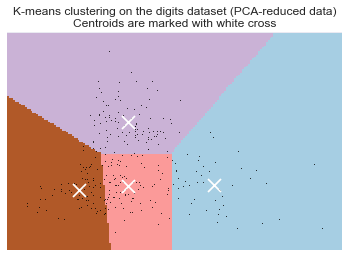

In [74]:
# #############################################################################
# Visualize the results on PCA-reduced data

kmeans.fit(data_r[:,0:2])

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .1     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = data_r[:, 0].min() - 1, data_r[:, 0].max() + 1
y_min, y_max = data_r[:, 1].min() - 1, data_r[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(data_r[:, 0], data_r[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [75]:
from sklearn import metrics

# Print the score
print("Model Type: {}\n".format(model_type))
print("Accuracy Score: {}%\n".format(round(metrics.accuracy_score(y_test, y_pred),4)))
# Print the classification report of `y_test` and `predicted`
print("Classification Report:\n")
print(metrics.classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:\n")
print(metrics.confusion_matrix(y_test, y_pred))
print("\n")
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
print('% 9s' % 'inertia    homo   compl  v-meas    ARI     AMI  silhouette')
print('%i      %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          %(kmeans.inertia_,
      homogeneity_score(y_test, y_pred),
      completeness_score(y_test, y_pred),
      v_measure_score(y_test, y_pred),
      adjusted_rand_score(y_test, y_pred),
      adjusted_mutual_info_score(y_test, y_pred),
      silhouette_score(X_test, y_pred, metric='euclidean')))

Model Type: k-means++

Accuracy Score: 0.2821%

Classification Report:

             precision    recall  f1-score   support

          0       0.06      0.04      0.05        27
          1       0.00      0.00      0.00        16
          2       1.00      1.00      1.00         8
          3       0.39      0.48      0.43        27

avg / total       0.26      0.28      0.27        78

Confusion Matrix:

[[ 1 15  0 11]
 [ 7  0  0  9]
 [ 0  0  8  0]
 [ 8  6  0 13]]


inertia    homo   compl  v-meas    ARI     AMI  silhouette
769      0.380   0.385   0.382   0.187   0.347    0.187


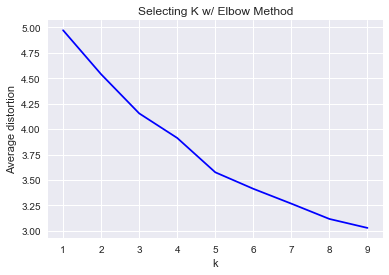

In [76]:
from scipy.spatial.distance import cdist
K = range(1, 10)
meandistortions = []
for k in K:
        kmeans = cluster.KMeans(n_clusters=k)
        kmeans.fit(X_test)
        meandistortions.append(sum(np.min(cdist(X_test, kmeans.cluster_centers_, 'euclidean'), axis = 1))/ X_test.shape[0])
        
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting K w/ Elbow Method')
plt.show()

In [77]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import cluster
from sklearn import svm, neighbors, tree
from sklearn.ensemble import RandomForestClassifier


# Scale data
#data = scale(data)
indices = np.arange(data.shape[0])

# Split the `digits` data into training and test sets
X_train, X_test, y_train, y_test, idx1, idx2 = train_test_split(data_scaled, labels_cat, indices, test_size=0.25, random_state=42)


# Working with svm
model_type = "svm"
# Set the parameter candidates
parameter_candidates = [
  {'C': [.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['linear']},
  {'C': [.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [.1, 1, 5, 10], 'gamma': [.1,1], 'degree': [4,5,6], 'kernel': ['poly']},
]
# Create a classifier with the parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)
# Train the classifier on training data
clf.fit(X_train, y_train)
svm_clf = clf.best_estimator_
svm_pred = svm_clf.predict(X_test)
# Print out the results 
print('Model: {0}. Params: {1}'.format(model_type, clf.best_params_))
print('Best score for {0} training data: {1}%'.format(model_type, round(100.0*clf.best_score_, 3)))
print('Accuracy score for {0} test data: {1}%\n'.format(model_type, (round(100.0*metrics.accuracy_score(y_test, svm_pred),4))))

# Working with k-nearest neighbors
model_type = "knn"
knn = neighbors.KNeighborsClassifier()

parameter_candidates = [
    {'n_neighbors': [x for x in np.arange(1,51)], 'leaf_size': [x for x in np.arange(5,65,5)]}
]
# Create a classifier with the parameter candidates
clf = GridSearchCV(estimator=knn, param_grid=parameter_candidates, n_jobs=-1)
# Train the classifier on training data
clf.fit(X_train, y_train)
knn_clf = clf.best_estimator_

knn_pred = knn_clf.predict(X_test)
# Print out the results 
print('Model: {0}. Params: {1}'.format(model_type, clf.best_params_))
print('Best score for {0} training data: {1}%'.format(model_type, round(100.0*clf.best_score_, 3)))
print('Accuracy score for {0} test data: {1}%\n'.format(model_type, (round(100.0*metrics.accuracy_score(y_test, knn_pred),4))))

# Working with RANDOM FORREST
model_type = "random forest"
rf = RandomForestClassifier()

parameter_candidates = [
    {'max_depth': [x for x in np.arange(1,51)], 'min_samples_split': [x for x in np.arange(2,11)]}
]
# Create a classifier with the parameter candidates
clf = GridSearchCV(estimator=rf, param_grid=parameter_candidates, n_jobs=-1)
# Train the classifier on training data
clf.fit(X_train, y_train)
rf_clf = clf.best_estimator_
rf_pred = rf_clf.predict(X_test)
# Print out the results 
print('Model: {0}. Params: {1}'.format(model_type, clf.best_params_))
print('Best score for {0} training data: {1}%'.format(model_type, round(100.0*clf.best_score_, 3)))
print('Accuracy score for {0} test data: {1}\n'.format(model_type, (round(100.0*metrics.accuracy_score(y_test, rf_pred),4))))



# Get Predictions
#y_pred = clf.best_estimator_.predict(X_test)

# Print the score
#print("Model Type: {}\n".format(model_type))
#print("Accuracy Score: {}%\n".format(round(metrics.accuracy_score(y_test, y_pred),4)))
# Print the classification report of `y_test` and `predicted`
#print("Classification Report:\n")
#print(metrics.classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred)))

# Print the confusion matrix
#print("Confusion Matrix:\n")
#print(metrics.confusion_matrix(y_test, y_pred))

Model: svm. Params: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best score for svm training data: 83.333%
Accuracy score for svm test data: 82.0513%

Model: knn. Params: {'leaf_size': 5, 'n_neighbors': 15}
Best score for knn training data: 74.359%
Accuracy score for knn test data: 78.2051%

Model: random forest. Params: {'max_depth': 17, 'min_samples_split': 4}
Best score for random forest training data: 83.761%
Accuracy score for random forest test data: 80.7692



Feature ranking:
1. feature Clearances (0.158789)
2. feature Interceptions (0.101260)
3. feature Aerials (0.084235)
4. feature Dispossessed (0.072067)
5. feature ShotsTotal (0.070025)
6. feature TacklesWon (0.064661)
7. feature SuccessfulPasses (0.058473)
8. feature SuccessTakeOns (0.054270)
9. feature ShotsOnTarget (0.049176)
10. feature BlockedShots (0.045691)
11. feature GKPunch (0.043513)
12. feature MinutesPlayed (0.036433)
13. feature ChancesCreated (0.025639)
14. feature Goals (0.023238)
15. feature GoalsConceded (0.021712)
16. feature GKCatch (0.019871)
17. feature SuccessCrosses (0.019782)
18. feature GKSaves (0.011821)
19. feature YellowCards (0.010163)
20. feature SuccessThroughBalls (0.009888)
21. feature CleanSheet (0.008621)
22. feature Assists (0.007291)
23. feature PenaltyWon (0.001619)
24. feature RedCards (0.001149)
25. feature SA (0.000613)
26. feature FoulsConceded (0.000000)
27. feature FoulsWon (0.000000)
28. feature PM (0.000000)
29. feature PS (0.000000)
30. fea

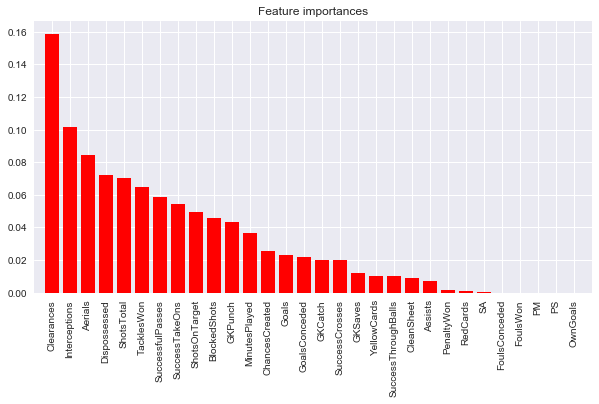

In [78]:
importances = rf_clf.feature_importances_
std = np.std([rf_clf.feature_importances_ for tree in rf_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, stats_cols[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(10,5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
stats_order = [stats_cols[x] for x in indices]
plt.xticks(range(X_train.shape[1]), stats_order, rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [83]:
df_stats['SuccessfulPasses']

0       73
1       49
2       80
3       41
4       51
5       78
6       53
7       46
8       60
9       15
10      11
11      10
12      13
13      16
14      14
15      13
16      12
17      11
18      16
19       9
20      19
21      15
22      11
23      19
24      13
25       7
26      17
27      13
28      21
29       6
        ..
5082     0
5083     0
5084     0
5085     0
5086     0
5087     0
5088     0
5089     0
5090     0
5091     0
5092     0
5093     0
5094     0
5095     0
5096     0
5097     0
5098     0
5099     0
5100     0
5101     0
5102     0
5103     0
5104     0
5105     0
5106     0
5107     0
5108     0
5109     0
5110     0
5111     0
Name: SuccessfulPasses, Length: 5112, dtype: int64